# Visualisation of stats about the graph and the data

## Setup and import data

In [5]:
import pickle
import matplotlib.pyplot as plt


In [2]:
inpath='out_202405211310'
testSize=''

In [3]:

edge_path = f'{inpath}/edges{testSize}.pkl'
graph_path = f'{inpath}/graph{testSize}.pkl'
tool_path = f'{inpath}/tools{testSize}.pkl'
nr_citations_path = f'{inpath}/nr_citations{testSize}.pkl'
node_degree_dict_path = f'{inpath}/node_degree_dict{testSize}.pkl'

In [4]:
print("Loading saved things.")
with open(edge_path, 'rb') as f:
    unq_edges = pickle.load(f) # edges included in graph, not sure if necessary. list of tuples 

with open(graph_path, 'rb') as f:
    G = pickle.load(f) # graph igraph 

with open(tool_path, 'rb') as f:
    included_tools = pickle.load(f) # tools in graph, list. Maybe do a comparison to the total number of tools, and print the list of tools not included in graph? this for later

with open(nr_citations_path, 'rb') as f: # citations per tool, dict. Histogram frequency of citation nr
    nr_citations = pickle.load(f) 

with open(node_degree_dict_path, 'rb') as f: #degrees per node (ons not tool. Should extraxt only tools using the included tools list), dict. Histogram - frequency of degree (perhaps do this before and after processing of graph (unique edges and only cocitations etc))
    node_degree_dict = pickle.load(f) 

Loading saved graph.


## Setup style and colour theme

In [8]:
# do it 

## Finished visualisations

### Visualising number of citations and degrees of each tool!

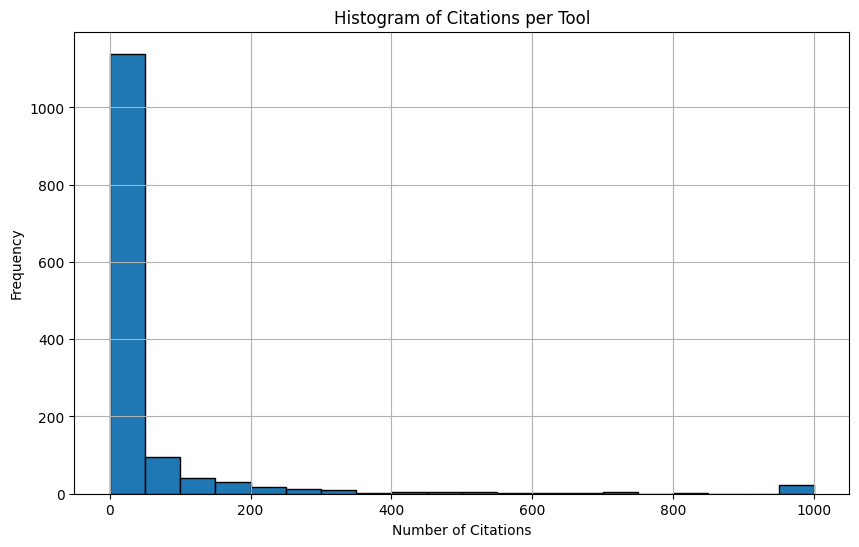

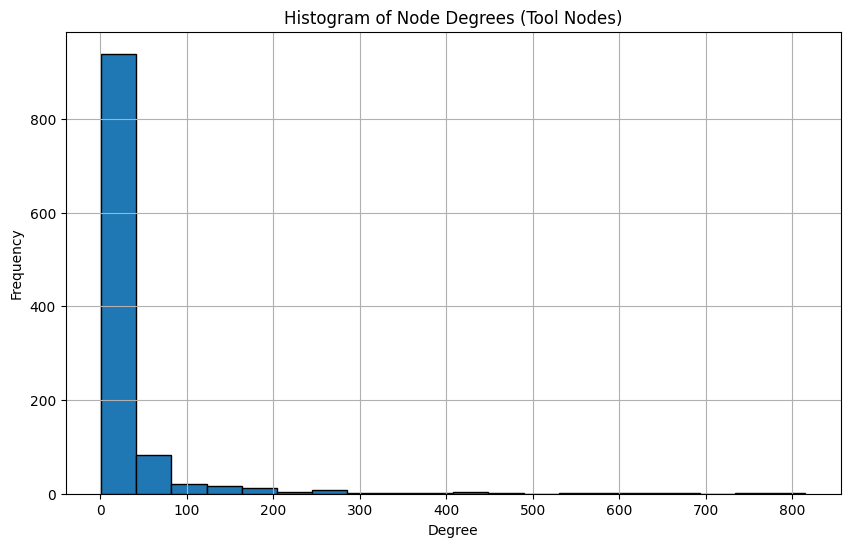

In [9]:
# Filter to keep only tool nodes
tool_nodes = set(included_tools)
tool_degrees = {node: degree for node, degree in node_degree_dict.items() if node in tool_nodes}

# Plotting the histogram for citations per tool
plt.figure(figsize=(10, 6))
plt.hist(nr_citations.values(), bins=20, edgecolor='black')
plt.title('Histogram of Citations per Tool')
plt.xlabel('Number of Citations')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plotting the histogram for node degrees
plt.figure(figsize=(10, 6))
plt.hist(tool_degrees.values(), bins=20, edgecolor='black')
plt.title('Histogram of Node Degrees (Tool Nodes)')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



### Visualising how degree and nr citations cooccur 

Though it is expected that higher degrees in the cocitation graph coincides with a higher nr of citations, it can be good to change this as a sanity check.


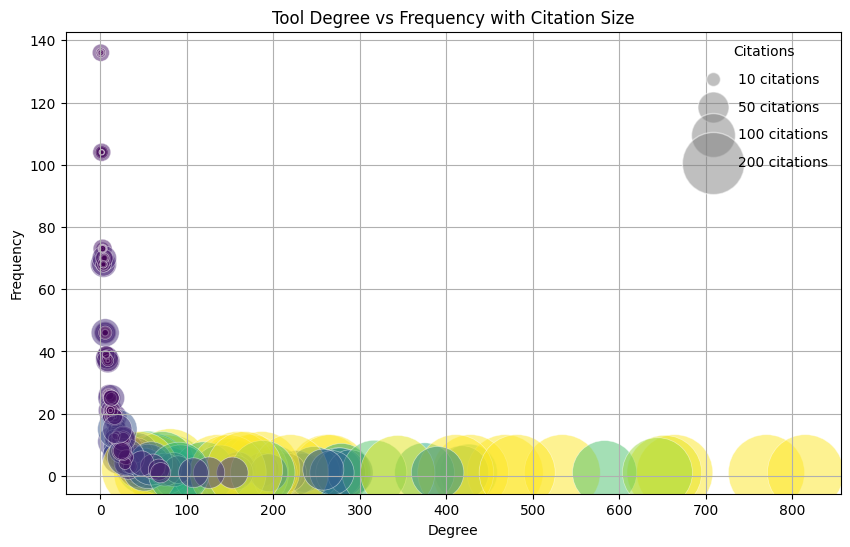

In [12]:
# Create lists for plotting
degrees = []
frequencies = []
sizes = []

# Calculate frequency of each degree # why noit just histogram? right because it is a weird plot
degree_frequency = {degree: 0 for degree in tool_degrees.values()} 
for degree in tool_degrees.values():
    degree_frequency[degree] += 1

for tool in tool_nodes:
    degrees.append(tool_degrees[tool])
    frequencies.append(degree_frequency[tool_degrees[tool]])
    sizes.append(nr_citations.get(tool, 0) * 3)  # Scale citation size for visibility

# Plotting the scatter diagram
plt.figure(figsize=(10, 6))
plt.scatter(degrees, frequencies, s=sizes, c=sizes, cmap='viridis', alpha=0.5, edgecolors="w", linewidth=0.5)
plt.title('Tool Degree vs Frequency with Citation Size')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.grid(True)

# Add a legend for size (example sizes)sizes
for size in [10, 50, 100, 200]:
    plt.scatter([], [], s=size*10, c='gray', alpha=0.5, edgecolors="w", label=f'{size} citations')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Citations')

plt.show()


With logarithmic x-axis

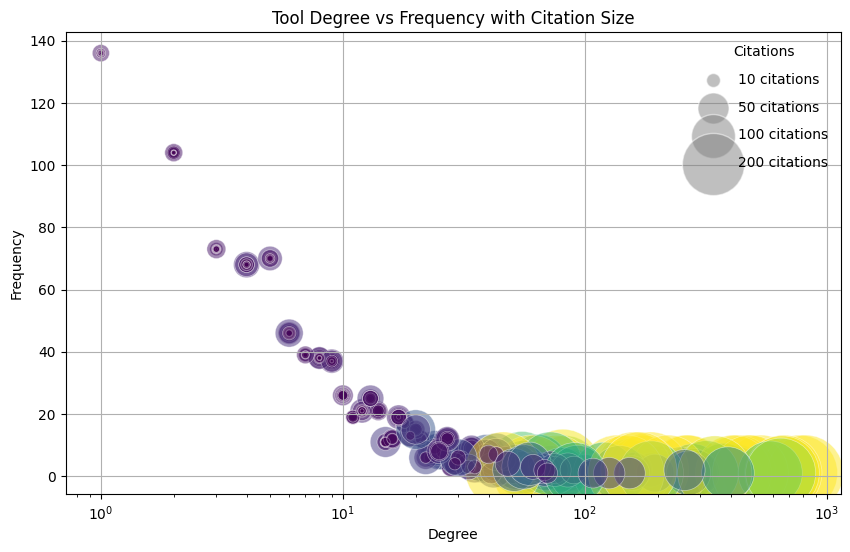

In [13]:
#log x axis
# Create lists for plotting
degrees = []
frequencies = []
sizes = []

# Calculate frequency of each degree
degree_frequency = {degree: 0 for degree in tool_degrees.values()}
for degree in tool_degrees.values():
    degree_frequency[degree] += 1

for tool in tool_nodes:
    degrees.append(tool_degrees[tool])
    frequencies.append(degree_frequency[tool_degrees[tool]])
    sizes.append(nr_citations.get(tool, 0) * 3)  # Scale citation size for visibility

# Plotting the scatter diagram
plt.figure(figsize=(10, 6))
plt.scatter(degrees, frequencies, s=sizes, c=sizes, cmap='viridis', alpha=0.5, edgecolors="w", linewidth=0.5)
plt.xscale('log')
plt.title('Tool Degree vs Frequency with Citation Size')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.grid(True)

# Add a legend for size (example sizes)
for size in [10, 50, 100, 200]:
    plt.scatter([], [], s=size*10, c='gray', alpha=0.5, edgecolors="w", label=f'{size} citations')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Citations')

plt.show()


### Visualising degrees for non tool, citation, nodes

Most importantly we want to know what the degree distribution of the non tool nodes are, so that we can detect ones that perhaps have a suspiciously large nr degrees and exclude them from the final graph. 

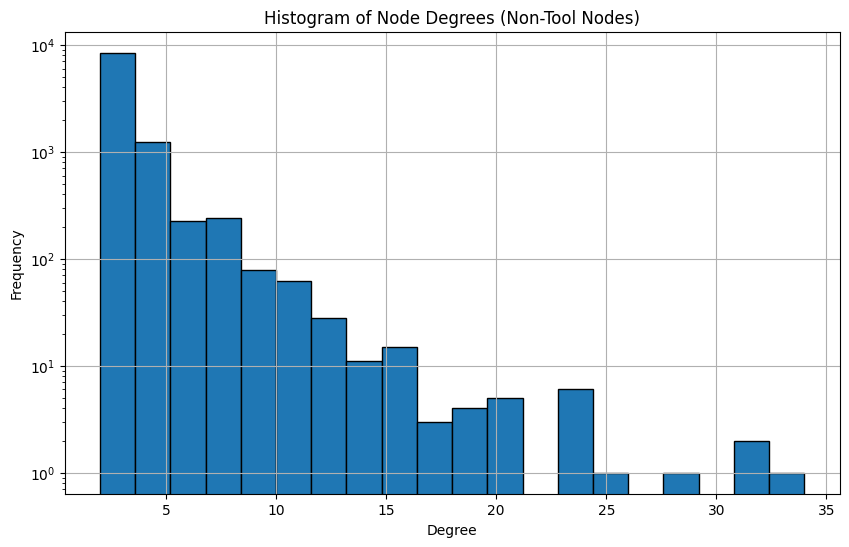

In [16]:
# Filter to keep only non-tool nodes
non_tool_nodes = set(node_degree_dict.keys()) - set(included_tools)
non_tool_degrees = {node: degree for node, degree in node_degree_dict.items() if node in non_tool_nodes}

# Create the histogram for non-tool node degrees
plt.figure(figsize=(10, 6))
plt.hist(non_tool_degrees.values(), bins=20, edgecolor='black')
plt.title('Histogram of Node Degrees (Non-Tool Nodes)')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Future things to implement

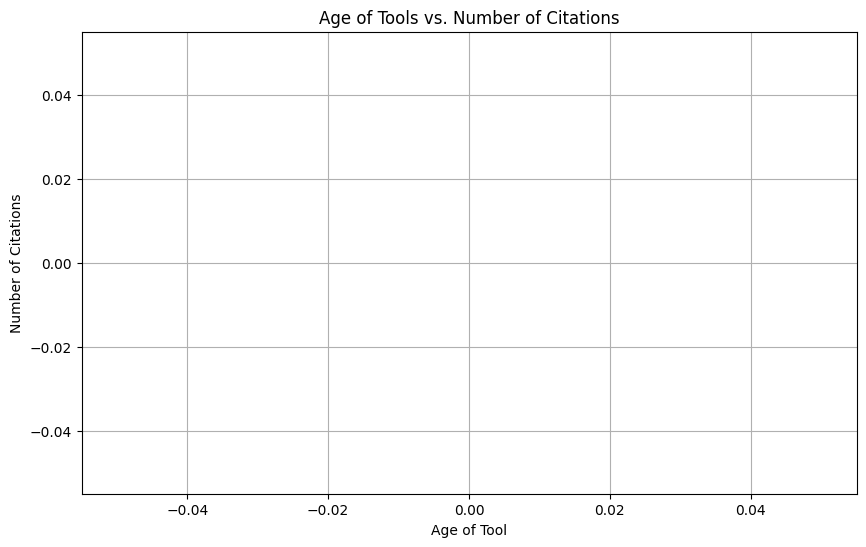

In [14]:


# TODO: Def add this later!! to correlate the age of tools to the number of citations.
# TODO: for this I need to add age as a metadata thing- perhaps primary publication pub year I guess shoudl work? not priority 
# tool_ages has tool names as keys and their ages as values
tool_ages = {} 

ages = []
citations = []

for tool, age in tool_ages.items():
    if tool in nr_citations:
        ages.append(age)
        citations.append(nr_citations[tool])

# Scatter plot to show correlation
plt.figure(figsize=(10, 6))
plt.scatter(ages, citations)
plt.title('Age of Tools vs. Number of Citations')
plt.xlabel('Age of Tool')
plt.ylabel('Number of Citations')
plt.grid(True)
plt.show()
